# lab 1

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# Bipolar activation function 
def bipolar_activation(x): 
    return 1 if x >= 0 else -1 
 
# Perceptron training function 
def perceptron_train(inputs, targets, learning_rate=0.1, max_epochs=100): 
    num_inputs = inputs.shape[1] 
    num_samples = inputs.shape[0] 
 
    # Initialize weights and bias 
    weights = np.random.randn(num_inputs) 
    bias = np.random.randn() 
 
    convergence_curve = [] 
 
    for epoch in range(max_epochs): 
        misclassified = 0 
 
        for i in range(num_samples): 
            net_input = np.dot(inputs[i], weights) + bias 
            predicted = bipolar_activation(net_input) 
 
            if predicted != targets[i]: 
                misclassified += 1 
                update = learning_rate * (targets[i] - predicted) 
                weights += update * inputs[i] 
                bias += update 
 
        accuracy = (num_samples - misclassified) / num_samples 
        convergence_curve.append(accuracy) 
 
        if misclassified == 0: 
            print("Converged in {} epochs.".format(epoch + 1)) 
            break 
 
    return weights, bias, convergence_curve 
 
 


Converged in 5 epochs.


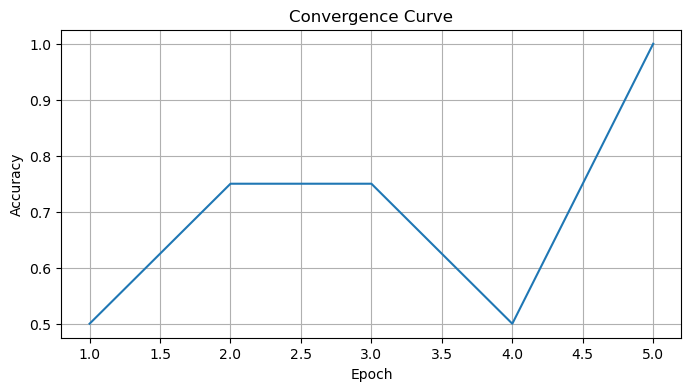

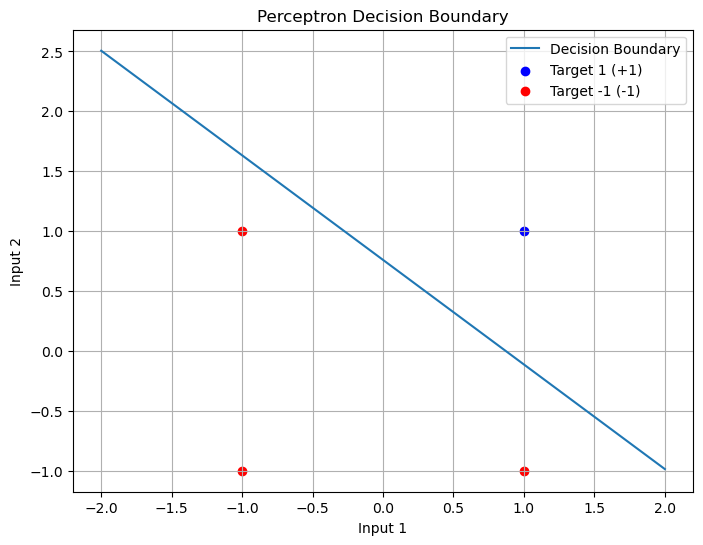

[1]
[1]


In [14]:
# Main function 
if __name__ == "__main__": 
    # Input and target data (bipolar representation)
    inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]]) 
    targets = np.array([-1, -1, -1, 1]) 
 
    # Training the perceptron 
    weights, bias, convergence_curve = perceptron_train(inputs, targets) 
 
    # Decision boundary line 
    x = np.linspace(-2, 2, 100) 
    y = (-weights[0] * x - bias) / weights[1] 
 
    # Plot convergence curve 
    plt.figure(figsize=(8, 4)) 
    plt.plot(range(1, len(convergence_curve) + 1), convergence_curve) 
    plt.xlabel('Epoch') 
    plt.ylabel('Accuracy') 
    plt.title('Convergence Curve') 
    plt.grid() 
    plt.show() 
 
    # Plot the decision boundary line and data points 
    plt.figure(figsize=(8, 6)) 
    plt.plot(x, y, label='Decision Boundary') 
    plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Target 1 (+1)', 
color='blue') 
    plt.scatter(inputs[targets == -1][:, 0], inputs[targets == -1][:, 1], label='Target -1 (-1)', 
color='red') 
    plt.xlabel('Input 1') 
    plt.ylabel('Input 2') 
    plt.title('Perceptron Decision Boundary') 
    plt.legend() 
    plt.grid() 
    plt.show() 
    print(inputs[targets == 1][:, 0]) 
    print(inputs[targets == 1][:, 1])

# lab 2

In [15]:
#XOR implementation using McCulloch pit neuron 
import numpy as np 
import matplotlib.pyplot as plt 
# Sigmoid activation function and its derivative (for training) 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x)) 
def sigmoid_derivative(x): 
    return x * (1 - x) 
# XOR function dataset 
inputs = np.array([[0, 0], 
                   [0, 1], 
                   [1, 0], 
                   [1, 1]]) 
targets = np.array([0, 1, 1, 0])  
# Neural network parameters 
input_layer_size = 2 
hidden_layer_size = 2 
output_layer_size = 1 
learning_rate = 0.1 
max_epochs = 10000 
 
# Initialize weights and biases with random values 
np.random.seed(42) 
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size) 
bias_hidden = np.random.randn(hidden_layer_size) 
weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size) 
bias_output = np.random.randn(output_layer_size) 
convergence_curve = [] 
# Training the neural network 



In [16]:
for epoch in range(max_epochs): 
    misclassified = 0 
    for i in range(len(inputs)): 
        # Forward pass 
        hidden_layer_input = np.dot(inputs[i], weights_input_hidden) + bias_hidden 
        hidden_layer_output = sigmoid(hidden_layer_input) 
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output 
        predicted_output = sigmoid(output_layer_input) 
 
        # Backpropagation 
        error = targets[i] - predicted_output 
        #print(error) 
        if targets[i] != predicted_output: 
            misclassified += 1 
 
        output_delta = error * sigmoid_derivative(predicted_output) 
        hidden_delta = output_delta.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)
                # Update weights and biases 
        weights_hidden_output += hidden_layer_output[:, np.newaxis] * output_delta * learning_rate 
        bias_output += output_delta * learning_rate 
 
        weights_input_hidden += inputs[i][:, np.newaxis] * hidden_delta * learning_rate 
        bias_hidden += hidden_delta * learning_rate 
     
    accuracy = (len(inputs) - misclassified) / len(inputs) 
    #print((accuracy)) 
    convergence_curve.append(accuracy) 
 
    if misclassified == 0: 
        print("Converged in {} epochs.".format(epoch + 1)) 
        break 
 

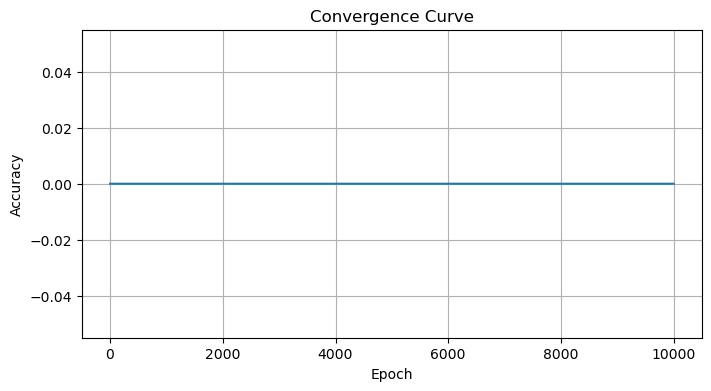

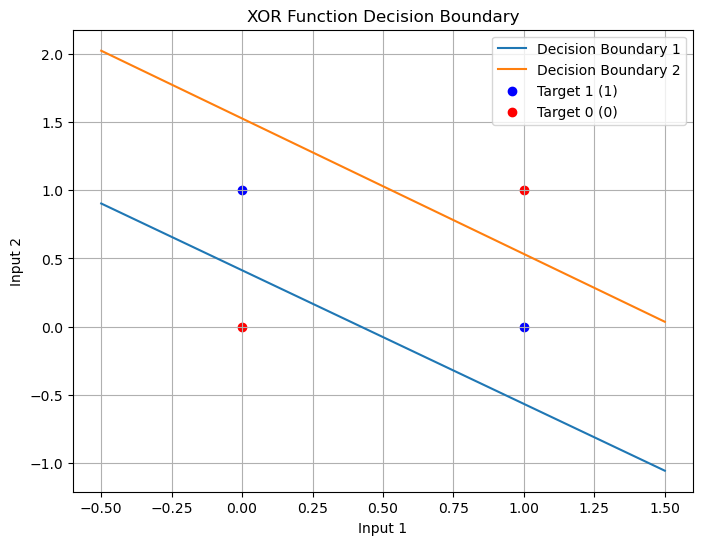

In [17]:

# Decision boundary line 
x = np.linspace(-0.5, 1.5, 100) 
y = (-weights_input_hidden[0, 0] * x - bias_hidden[0]) / weights_input_hidden[1, 0] 
y2 = (-weights_input_hidden[0, 1] * x - bias_hidden[1]) / weights_input_hidden[1, 1] 
 
# Plot convergence curve 
plt.figure(figsize=(8, 4)) 
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve) 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.title('Convergence Curve') 
plt.grid() 
plt.show() 
 
# Plot the decision boundary line and data points 
plt.figure(figsize=(8, 6)) 
plt.plot(x, y, label='Decision Boundary 1') 
plt.plot(x, y2, label='Decision Boundary 2') 
plt.scatter(inputs[targets == 1][:, 0], inputs[targets == 1][:, 1], label='Target 1 (1)', color='blue') 
plt.scatter(inputs[targets == 0][:, 0], inputs[targets == 0][:, 1], label='Target 0 (0)', color='red') 
plt.xlabel('Input 1') 
plt.ylabel('Input 2') 
plt.title('XOR Function Decision Boundary') 
plt.legend() 
plt.grid() 
plt.show()

# lab 3 

In [1]:
import numpy as np 
 
# Sigmoid activation function and its derivative (for training) 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x)) 
 
def sigmoid_derivative(x): 
    return x * (1 - x) 
 
# Input and target datasets 
X_input = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]) 
D_target = np.array([[0], [0], [1], [1]]) 
 
# Neural network parameters 
input_layer_size = 3 
output_layer_size = 1 
learning_rate = 0.1 
max_epochs = 10000 
 
# Initialize weights with random values 
np.random.seed(42) 
weights = np.random.randn(input_layer_size, output_layer_size) 
 
# Training the neural network with SGD 
for epoch in range(max_epochs): 
    error_sum = 0 
 
    for i in range(len(X_input)): 
        # Forward pass 
        input_data = X_input[i] 
        target_data = D_target[i] 
 
        net_input = np.dot(input_data, weights) 
        predicted_output = sigmoid(net_input) 
 
        # Calculate error 
        error = target_data - predicted_output 
        error_sum += np.abs(error) 
 
        # Update weights using the delta learning rule 
        weight_update = learning_rate * error * sigmoid_derivative(predicted_output) * input_data 
        weights += weight_update[:, np.newaxis]  # Update weights for each input separately 
 
    # Check for convergence 
    if error_sum < 0.01: 
        print("Converged in {} epochs.".format(epoch + 1)) 
        break 
 
# Test data 
test_data = X_input 
# Use the trained model to recognize target function 
print("Target Function Test:") 
for i in range(len(test_data)): 
    input_data = test_data[i] 
    net_input = np.dot(input_data, weights) 
    predicted_output = sigmoid(net_input) 
    print(f"Input: {input_data} -> Output: {np.round(predicted_output)}") 

Target Function Test:
Input: [0 0 1] -> Output: [0.]
Input: [0 1 1] -> Output: [0.]
Input: [1 0 1] -> Output: [1.]
Input: [1 1 1] -> Output: [1.]


# lab 4

In [1]:
import numpy as np 
import time 
 
# Sigmoid activation function and its derivative (for training) 
def sigmoid(x): 
    return 1 / (1 + np.exp(-x)) 
 
def sigmoid_derivative(x): 
    return x * (1 - x) 
 
# XOR function dataset with binary inputs and outputs 
X_input = np.array([[0, 0, 1],[0, 1, 1],[1, 0, 1],[1, 1, 1]]) 
 
D_target = np.array([[0],[0],[1],[1]]) 
 
# Neural network parameters 
input_layer_size = 3 
output_layer_size = 1 
learning_rate = 0.1 
max_epochs = 10000 

In [2]:
# Initialize weights with random values 
np.random.seed(42) 
weights_sgd = np.random.randn(input_layer_size, output_layer_size) 
weights_batch = np.random.randn(input_layer_size, output_layer_size) 
 
# Training the neural network with SGD 
start_time_sgd = time.time() 
for epoch in range(max_epochs): 
    error_sum = 0 
 
    for i in range(len(X_input)): 
        # Forward pass 
        input_data = X_input[i] 
        target_data = D_target[i] 
 
        net_input = np.dot(input_data, weights_sgd) 
        predicted_output = sigmoid(net_input) 
 
        # Calculate error 
        error = target_data - predicted_output 
        error_sum += np.abs(error) 
 
        # Update weights using the delta learning rule 
        weight_update = learning_rate * error * sigmoid_derivative(predicted_output) * input_data 
        weights_sgd += weight_update[:, np.newaxis]  # Update weights for each input separately 
 
    # Check for convergence 
    if error_sum < 0.01: 
        break 
end_time_sgd = time.time() 
 
# Training the neural network with the batch method 
start_time_batch = time.time() 
for epoch in range(max_epochs): 
    # Forward pass 
    net_input = np.dot(X_input, weights_batch) 
    predicted_output = sigmoid(net_input) 
 
    # Calculate error 
    error = D_target - predicted_output 
    error_sum = np.sum(np.abs(error)) 
 
    # Update weights using the delta learning rule 
    weight_update = learning_rate * np.dot(X_input.T, error * sigmoid_derivative(predicted_output)) 
    weights_batch += weight_update 
 
    # Check for convergence 
    if error_sum < 0.01: 
        break 
end_time_batch = time.time() 
 
# Test data 
test_data = X_input 
 
# Use the trained models to recognize target function 
def test_model(weights): 
    predicted_output = sigmoid(np.dot(test_data, weights)) 
    return np.round(predicted_output)



In [3]:
print("SGD Results:") 
print("Time taken: {:.6f} seconds".format(end_time_sgd - start_time_sgd)) 
print("Trained weights:") 
print(weights_sgd) 
print("Predicted binary outputs:") 
print(test_model(weights_sgd)) 
print("\nBatch Method Results:") 
print("Time taken: {:.6f} seconds".format(end_time_batch - start_time_batch)) 
print("Trained weights:") 
print(weights_batch) 
print("Predicted binary outputs:") 
print(test_model(weights_batch)) 

SGD Results:
Time taken: 0.552220 seconds
Trained weights:
[[ 7.25950187]
 [-0.22431325]
 [-3.41036643]]
Predicted binary outputs:
[[0.]
 [0.]
 [1.]
 [1.]]

Batch Method Results:
Time taken: 0.169929 seconds
Trained weights:
[[ 7.26775966]
 [-0.22304058]
 [-3.41538639]]
Predicted binary outputs:
[[0.]
 [0.]
 [1.]
 [1.]]


# lab 5

In [13]:
import numpy as np

def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def multi_class(W1, W2, X, D):
    alpha = 0.9
    N = 5

    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        d = D[k, :].reshape(-1, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        e = d - y
        delta = e
        e1 = np.dot(W2.T, delta)
        delta1 = y1 * (1 - y1) * e1
        dW1 = alpha * np.dot(delta1, x.T)
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta, y1.T)
        W2 = W2 + dW2

    return W1, W2

def main():
    np.random.seed(3)
    X = np.zeros((5, 5, 5))
    X[:, :, 0] = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 0, 1, 0, 0],
                           [0, 1, 1, 1, 0]])
    X[:, :, 1] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 1]])
    X[:, :, 2] = np.array([[1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [0, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])
    X[:, :, 3] = np.array([[0, 0, 0, 1, 0],
                           [0, 0, 1, 1, 0],
                           [0, 1, 0, 1, 0],
                           [1, 1, 1, 1, 1],
                           [0, 0, 0, 1, 0]])
    X[:, :, 4] = np.array([[1, 1, 1, 1, 1],
                           [1, 0, 0, 0, 0],
                           [1, 1, 1, 1, 0],
                           [0, 0, 0, 0, 1],
                           [1, 1, 1, 1, 0]])

    D = np.eye(5)

    W1 = 2 * np.random.rand(50, 25) - 1
    W2 = 2 * np.random.rand(5, 50) - 1

    for epoch in range(10000):
        W1, W2 = multi_class(W1, W2, X, D)

    N = 5
    for k in range(N):
        x = X[:, :, k].reshape(25, 1)
        v1 = np.dot(W1, x)
        y1 = sigmoid(v1)
        v = np.dot(W2, y1)
        y = softmax(v)
        print(f"\n\n Output for X[:,:,{k}]:\n\n")
        print(f"{y} \n\n This matrix from see that {k+1} position accuracy is higher that is : {max(y)} So this number is correctly identified")

if __name__ == "__main__":
    main()




 Output for X[:,:,0]:


[[9.99990560e-01]
 [3.73975045e-06]
 [7.29323123e-07]
 [4.95516529e-06]
 [1.56459758e-08]] 

 This matrix from see that 1 position accuracy is higher that is : [0.99999056] So this number is correctly identified


 Output for X[:,:,1]:


[[3.81399150e-06]
 [9.99984069e-01]
 [1.07138749e-05]
 [7.38201374e-07]
 [6.65377695e-07]] 

 This matrix from see that 2 position accuracy is higher that is : [0.99998407] So this number is correctly identified


 Output for X[:,:,2]:


[[2.10669179e-06]
 [9.17015598e-06]
 [9.99972467e-01]
 [2.22084036e-06]
 [1.40352894e-05]] 

 This matrix from see that 3 position accuracy is higher that is : [0.99997247] So this number is correctly identified


 Output for X[:,:,3]:


[[4.72578106e-06]
 [8.98916172e-07]
 [9.07090140e-07]
 [9.99990801e-01]
 [2.66714208e-06]] 

 This matrix from see that 4 position accuracy is higher that is : [0.9999908] So this number is correctly identified


 Output for X[:,:,4]:


[[6.12205780e-07]
 [2.2

# lab 6

In [9]:
pip install keras==2.9.0

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.6 MB 1.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.6 MB 2.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.6 MB 2.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.6 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.6 MB 2.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.6 MB 3.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.1/1.6 MB 3.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.1/1.6 MB 2.9 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.6 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.4/1.6 MB 2.6 MB/s eta 0:00:01
   --------------

In [18]:
import tensorflow 
import os

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:


def load_data(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = folder.split('/')[-1]
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (150, 150))  # Resize the image to a consistent size
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        images.append(img)
        labels.append(label)
    return images, labels



roses_folder = './flower/roses/'
sunflowers_folder = 'sunflowers'

roses_images, roses_labels = load_data(roses_folder)
sunflowers_images, sunflowers_labels = load_data(sunflowers_folder)

# Combine the data
images = np.array(roses_images + sunflowers_images)
labels = np.array(roses_labels + sunflowers_labels)
print(labels)

# Encode labels to numerical values
label_dict = {'roses': 0, 'sunflowers': 1}
encoded_labels = np.array([label_dict[label] for label in labels])
print(encoded_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.15,random_state=42)

# Normalize the pixel values between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

['roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'roses'
 'roses' 'roses' 'roses' 'roses' 'roses' 'roses' 'r

In [21]:
import matplotlib.pyplot as plt


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32)



D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.5524 - loss: 0.7043
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.8799 - loss: 0.3260
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.8822 - loss: 0.2639
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.8874 - loss: 0.2607
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.8896 - loss: 0.2608
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.9352 - loss: 0.2289
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.9279 - loss: 0.2219
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.9296 - loss: 0.2485
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.9213 - loss: 0.1887
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.9508 - loss: 0.1623
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.9490 - loss: 0.1666
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8697 - loss: 0.6400


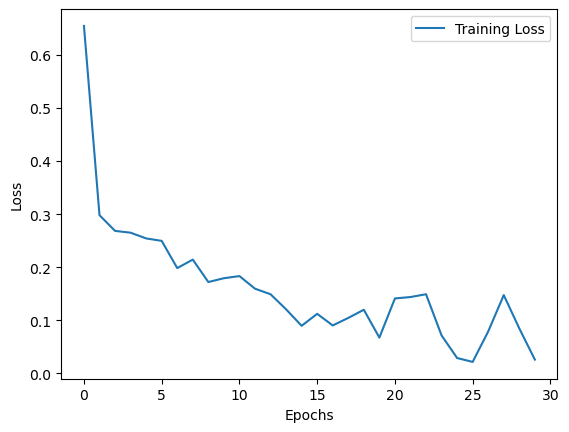

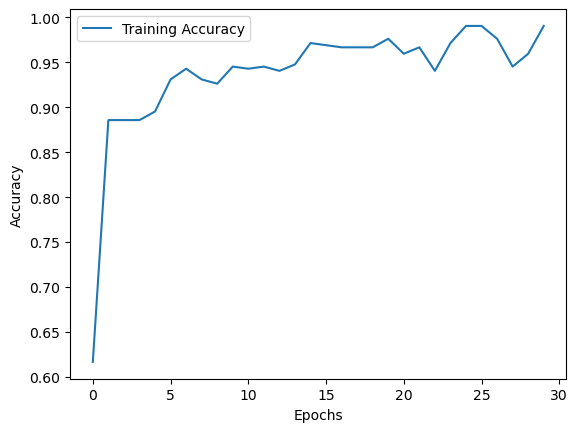

Test accuracy: 87.99999952316284


In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test accuracy:', accuracy*100)

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test image
test_image_path = 'roses/110472418_87b6a3aa98_m.jpg'  # Replace with the actual path of your test image

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Predict the class of the test image
prediction = model.predict(test_image)
print('prediction',prediction)
if prediction < 0.5:
  print('This is roses')
elif prediction >= 0.5:
  print('This is sunflowers')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
prediction [[5.8635665e-13]]
This is roses


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test image
test_image_path = 'pic2.jpg'  # Replace with the actual path of your test image

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Predict the class of the test image
prediction = model.predict(test_image)
print('prediction',prediction)
if prediction < 0.5:
  print('This is Banana')
elif prediction >= 0.5:
  print('This is Cucumber')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


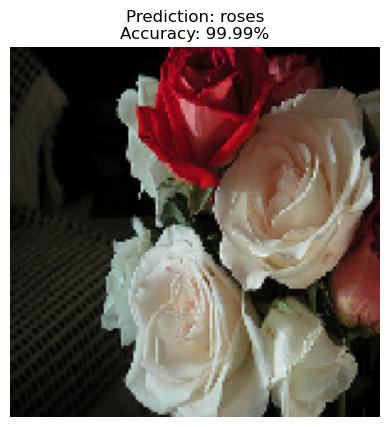

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
test_image_path = 'roses/102501987_3cdb8e5394_n.jpg'  # Replace with the actual path of your test image

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(150, 150))
test_image_array = image.img_to_array(test_image)
test_image = np.expand_dims(test_image_array, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Predict the class of the test image
prediction = model.predict(test_image)[0][0]  # Get the predicted probability for the class
accuracy = prediction * 100 if prediction >= 0.5 else (1 - prediction) * 100

# Display the prediction result
if prediction < 0.5:
    predicted_class = 'roses'
else:
    predicted_class = 'sunflower'

# Plot the image with prediction
plt.imshow(test_image_array / 255.0)  # Show the image
plt.title(f'Prediction: {predicted_class}\nAccuracy: {accuracy:.2f}%')
plt.axis('off')  # Hide the axis
plt.show()


# lab 7

In [28]:
import tensorflow as tf
import numpy as np

# Define the network structure
class ANN(tf.keras.Model):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = tf.keras.layers.Dense(2, activation='sigmoid')
        self.fc2 = tf.keras.layers.Dense(2, activation='sigmoid')
        self.fc3 = tf.keras.layers.Dense(2)  # Output layer without activation

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)  # No activation on output layer
        return x

# Initialize the network
net = ANN()

# Build the network with dummy input to initialize the weights
dummy_input = np.array([[0.05, 0.10]], dtype=np.float32)
net(dummy_input)

# Manually setting weights and biases after the network has been built
net.fc1.set_weights([np.array([[0.15, 0.20], [0.25, 0.30]], dtype=np.float32),
                     np.array([0.35, 0.60], dtype=np.float32)])

net.fc2.set_weights([np.array([[0.40, 0.45], [0.50, 0.55]], dtype=np.float32),
                     np.array([0.60, 0.70], dtype=np.float32)])

# Training parameters
learning_rate = 0.1
epochs = 10000

# Define the loss function and optimizer
criterion = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Input data and target output
input_data = np.array([[0.05, 0.10]], dtype=np.float32)  # Shape: (1, 2)
target_output = np.array([[0.01, 0.99]], dtype=np.float32)  # Shape: (1, 2)

# Training the network
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        outputs = net(input_data)  # Forward pass
        loss = criterion(target_output, outputs)  # Calculate the loss

    gradients = tape.gradient(loss, net.trainable_variables)  # Backward pass
    optimizer.apply_gradients(zip(gradients, net.trainable_variables))  # Optimization step

    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.numpy():.4f}')

# Final output after training
final_output = net(input_data)
print("Final output after training:")
print(final_output.numpy())


Epoch [1000/10000], Loss: 0.0000
Epoch [2000/10000], Loss: 0.0000
Epoch [3000/10000], Loss: 0.0000
Epoch [4000/10000], Loss: 0.0000
Epoch [5000/10000], Loss: 0.0000
Epoch [6000/10000], Loss: 0.0000
Epoch [7000/10000], Loss: 0.0000
Epoch [8000/10000], Loss: 0.0000
Epoch [9000/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000
Final output after training:
[[0.00999993 0.99      ]]


# lab 8

In [31]:
import numpy as np 
import librosa 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
 


In [30]:
pip install librosa

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/260.1 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 112.6/260.1 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 174.1/260.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 260.1/260.1 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.0 MB 3.8 MB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.0 MB 2.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.3/1.0 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.0 MB 2.7 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 2.9 MB/s eta 0:00:01
   ----------

In [32]:
# 1. Preprocess the speech signals 
def extract_features(file_name): 
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')  
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) 
    mfccs_scaled = np.mean(mfccs.T,axis=0) 
    return mfccs_scaled 
 
# Load dataset (Assume you have a dataset with files named 1.wav, 2.wav, etc.) 
data = [] 
labels = [] 
 
for i in range(1, 5): 
    file_name = f"{i}.wav"  # Example: 1.wav, 2.wav, 3.wav, 4.wav 
    features = extract_features(file_name) 
    data.append(features) 
    labels.append(i) 
 
# Convert data and labels into numpy arrays 
X = np.array(data) 
y = np.array(labels) 
 
# Encode labels as categorical 
label_encoder = LabelEncoder() 
y_encoded = label_encoder.fit_transform(y) 
y_onehot = to_categorical(y_encoded) 
 
# 2. Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42) 
 


C:\Users\Shoaib Ahmad\AppData\Local\Temp\ipykernel_14160\916554839.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
D:\anaconda\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '1.wav'

In [ ]:
# 3. Build the ANN model 
model = Sequential() 
model.add(Dense(128, input_shape=(40,), activation='relu'))  # Input shape is based on the MFCC size (40) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes (numbers 1 to 4)
# Compile the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# 4. Train the model 
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test)) 
# 5. Evaluate the model 
test_loss, test_accuracy = model.evaluate(X_test, y_test) 
print(f"Test accuracy: {test_accuracy * 100:.2f}%") 
# 6. Prediction 
def predict_number(file_name): 
features = extract_features(file_name) 
features = np.expand_dims(features, axis=0)  # Expand dimensions for the ANN input 
prediction = model.predict(features) 
predicted_label = np.argmax(prediction, axis=1) 
predicted_number = label_encoder.inverse_transform(predicted_label) 
return predicted_number[0] 
# Test with a new speech sample 
predicted_number = predict_number('test.wav') 
print(f"The predicted number is: {predicted_number}")

# lab 9

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.datasets import fetch_openml 
 
# Load the Boston housing dataset 
boston = fetch_openml(name='boston', version=1, as_frame=True) 
X = boston.data 
y = boston.target 
 
# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
# Create an SVM regressor 
svr = SVR(kernel='linear')  # You can also try 'rbf' or 'poly' 
 
# Fit the model on the training data 
svr.fit(X_train, y_train) 
 
# Make predictions on the test set 
y_pred = svr.predict(X_test) 
 
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
 
print(f'Mean Squared Error: {mse:.2f}') 
print(f'R^2 Score: {r2:.2f}') 
 
# Print predicted values for the test set 
print("\nPredicted values for the test set:")

D:\anaconda\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Mean Squared Error: 29.44
R^2 Score: 0.60

Predicted values for the test set:


Actual: 23.60, Predicted: 26.11
Actual: 32.40, Predicted: 32.55
Actual: 13.60, Predicted: 15.52
Actual: 22.80, Predicted: 24.14
Actual: 16.10, Predicted: 18.50
Actual: 20.00, Predicted: 21.23
Actual: 17.80, Predicted: 17.48
Actual: 14.00, Predicted: 16.38
Actual: 19.60, Predicted: 19.45
Actual: 16.80, Predicted: 20.17
Actual: 21.50, Predicted: 21.02
Actual: 18.90, Predicted: 18.04
Actual: 7.00, Predicted: -7.38
Actual: 21.20, Predicted: 20.89
Actual: 18.50, Predicted: 17.66
Actual: 29.80, Predicted: 25.25
Actual: 18.80, Predicted: 19.43
Actual: 10.20, Predicted: 4.86
Actual: 50.00, Predicted: 40.08
Actual: 14.10, Predicted: 17.04
Actual: 25.20, Predicted: 26.83
Actual: 29.10, Predicted: 28.85
Actual: 12.70, Predicted: 12.07
Actual: 22.40, Predicted: 24.91
Actual: 14.20, Predicted: 16.49
Actual: 13.80, Predicted: 12.26
Actual: 20.30, Predicted: 21.19
Actual: 14.90, Predicted: 14.36
Actual: 21.70, Predicted: 18.94
Actual: 18.30, Predicted: 18.84
Actual: 23.10, Predicted: 19.15
Actual: 23

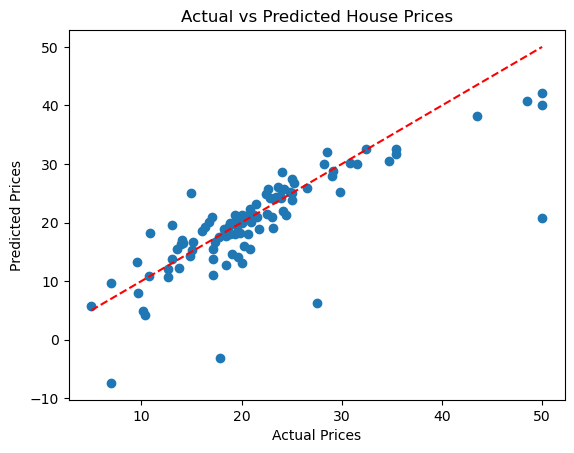


Predicted values for custom test data:
Custom Test Data 1: Predicted Price: 26.34
Custom Test Data 2: Predicted Price: 24.27


D:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [34]:
for actual, predicted in zip(y_test, y_pred): 
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}") 
 
# Plotting the predicted vs actual values 
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual Prices') 
plt.ylabel('Predicted Prices') 
plt.title('Actual vs Predicted House Prices') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.show() 
 
# Note: Ensure that the custom data has the same feature structure as the training data 
custom_test_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 2.0, 240.0, 17.8, 396.9, 9.14], 
                              [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 240.0, 19.58, 396.9, 4.03]]) 
# Predicting house prices for custom test data 
custom_predictions = svr.predict(custom_test_data) 
 
print("\nPredicted values for custom test data:") 
for i, prediction in enumerate(custom_predictions): 
    print(f"Custom Test Data {i + 1}: Predicted Price: {prediction:.2f}") 

# lab 10

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

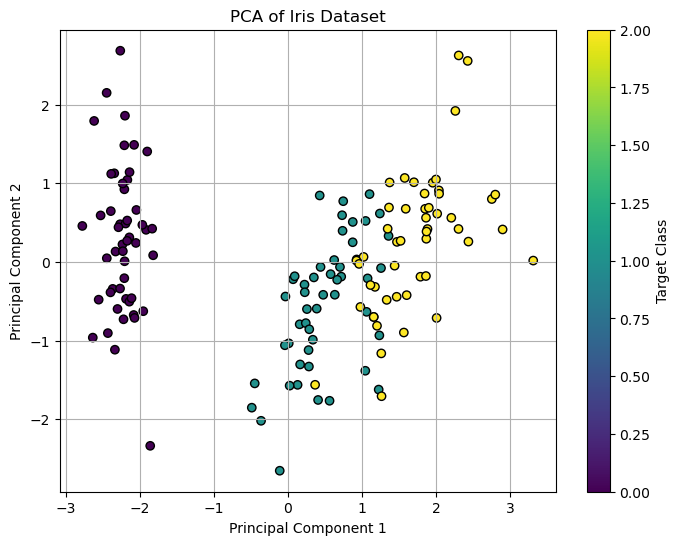

Explained variance by each component: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000164


In [37]:
# Load the Iris dataset 
iris = load_iris() 
X = iris.data 
y = iris.target 
 
# Standardize the data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
 
# Apply PCA 
pca = PCA(n_components=2)  # Reduce to 2 dimensions 
X_pca = pca.fit_transform(X_scaled) 
 
# Create a DataFrame for the PCA results 
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2']) 
pca_df['Target'] = y 
 
# Plot the PCA results 
plt.figure(figsize=(8, 6)) 
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Target'], 
cmap='viridis', edgecolor='k') 
plt.title('PCA of Iris Dataset') 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2') 
plt.colorbar(scatter, label='Target Class') 
plt.grid() 
plt.show() 
 
# Explained variance 
explained_variance = pca.explained_variance_ratio_ 
print(f'Explained variance by each component: {explained_variance}') 
print(f'Total explained variance: {sum(explained_variance)}')